[-0.62231486  0.42269922 -0.35716016  0.49505163  0.53376487  0.71434306
 -0.45599278 -1.16715888 -1.62831727 -0.25191539]
-0.62231486 0.42269922
-0.62231486 -1.67427011 1.0
[-0.96251306 -1.8117848   0.82887254  0.81221287]
-0.96251306 -1.8117848
-0.96251306 -1.81046748 -1.0
[-0.62231486  0.42269922 -0.35716016  0.49505163  0.53376487  0.71434306
 -0.45599278 -1.16715888 -0.25191539]
-0.62231486 0.42269922
-0.62231486 -1.67427011 1.0
[-0.96251306]
-0.96251306 -1.81046748 -1.0
[-0.62231486  0.42269922 -0.35716016  0.49505163  0.53376487  0.71434306
 -0.45599278 -1.16715888 -0.25191539]
-0.62231486 0.42269922
-0.62231486 -1.67427011 1.0
Complete!


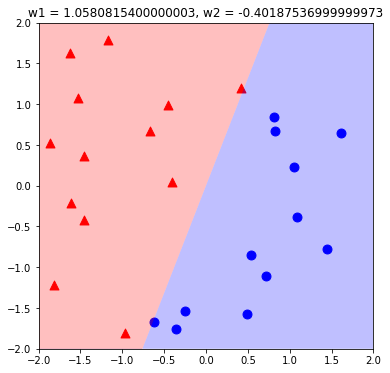

In [3]:
# https://rhadow.github.io/2016/02/24/ml-lecture-2/
# code: http://cpmarkchang.logdown.com/posts/189108-machine-learning-perceptron-algorithm

import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([-0.62231486, -0.96251306,  0.42269922, -1.452746  , -0.66915783,
               -0.35716016,  0.49505163, -1.8117848 ,  0.53376487, -1.86923838,
                0.71434306, -0.4055084 ,  0.82887254,  0.81221287,  1.44280951,
               -0.45599278, -1.16715888,  1.08913131, -1.61470741,  1.61113001,
               -1.4532688 ,  1.04872588, -1.52312195, -1.62831727, -0.25191539])

X2 = np.array([-1.67427011, -1.81046748,  1.20384694, -0.41572751,  0.66851908,
               -1.75435288, -1.57532207, -1.22329618, -0.84375819,  0.52873296,
               -1.10837773,  0.04612922,  0.67696196,  0.84618152, -0.77362548,
                0.99153072,  1.7896494 , -0.38343121, -0.21337742,  0.64754817,
                0.36719101,  0.23132427,  1.07029963,  1.62919909, -1.53920827])

Y = np.array([  1.,  -1.,  -1.,  -1.,  -1.,
                1.,   1.,  -1.,   1.,  -1.,
                1.,  -1.,   1.,   1.,   1., 
               -1.,  -1.,   1.,  -1.,   1., 
               -1.,   1.,  -1.,  -1.,   1.])

def plot_data(filename = 'data0'):
    xl1 = yl1 = -2.0 
    xl2 = yl2 = 2.0
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y >= 0], X2[Y >= 0], s = 80, c = 'b', marker = "o")
    plt.scatter(X1[Y <  0], X2[Y  < 0], s = 80, c = 'r', marker = "^")
    ax.set_xlim(xl1, xl2)
    ax.set_ylim(yl1, yl2)
    fig.set_size_inches(6, 6)
    plt.show()  
    
def plot_data_and_line(w1,w2):
    w1,w2 = float(w1),float(w2)
    xl1 = yl1 = -2.0 
    xl2 = yl2 = 2.0
    if w2 != 0 :
        y1,y2 = (-w1*(xl1))/w2, (-w1*(xl2))/w2
        vx1,vy1 = [xl1,xl2,xl2,xl1,xl1], [y1,y2,yl2,yl2,y1]
        vx2,vy2 = [xl1,xl2,xl2,xl1,xl1], [y1,y2,yl1,yl1,y1]
    elif w1 != 0:
        vx1,vy1 = [xl2,0,0,xl2,xl2], [yl1,yl1,yl2,yl2,yl1]
        vx2,vy2 = [xl1,0,0,xl1,xl1], [yl1,yl1,yl2,yl2,yl1]
    else:
        print ("ERROR, Invalid w1 and w2.")
        return;
    if  w2 > 0 or ( w2 == 0 and w1 > 0):
        c1,c2 = 'b','r'
    else:
        c1,c2 = 'r','b'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y > 0], X2[Y > 0], s = 80, c = 'b', marker = "o")
    plt.scatter(X1[Y<= 0], X2[Y<= 0], s = 80, c = 'r', marker = "^")
    plt.fill(vx1, vy1, c1, alpha = 0.25)
    plt.fill(vx2, vy2, c2, alpha = 0.25)
    ax.set_title(("w1 = %s, w2 = %s")%( w1, w2))
    ax.set_xlim(xl1, xl2)
    ax.set_ylim(yl1, yl2)
    fig.set_size_inches(6, 6)
    plt.show()
    
    
def learn_perceptron(times=1000):
    w1,w2 = 1,1
    for i in range(times):
        ERR = (w1*X1+w2*X2) * Y < 0
        #print (ERR)
        l=list(filter(bool,ERR))
        if len(l) > 0:
           print(X1[ERR])
           if len(l) > 1:
              print(X1[ERR][0], X1[ERR][1])  #magic
           err_x1,err_x2,err_y = X1[ERR][0],X2[ERR][0],Y[ERR][0]
           print(err_x1,err_x2,err_y)
           w1,w2 = (w1+err_y*err_x1),(w2+err_y*err_x2)
        else: 
           print ("Complete!")
           break;
    plot_data_and_line(w1,w2)
    
    
#plot_data()
#plot_data_and_line(1,1)
learn_perceptron()
